In [1]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from skimage import measure
import imageio
import os
import matplotlib.pyplot as plt

# function to make the 3D volume plot starting from 2D mask slices
def plot_3d(image, threshold=-300): 
    p = image.transpose(2,1,0)
    verts, faces, normals, values = measure.marching_cubes_lewiner(p, threshold)
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.6)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(-5, 12)
    plt.savefig("esempio_segmentation_3d.png")
    plt.show()

In [2]:
path_images = "Data/Train/Images/Sunnybrook_Part1/"
path_labels = "Data/Train/Labels/Sunnybrook_Part1/"

# select all the slices of one patient
list_names = [
"SC-HF-I-02-IM-0001-0060.dcm.png",
"SC-HF-I-02-IM-0001-0080.dcm.png",
"SC-HF-I-02-IM-0001-0100.dcm.png",
"SC-HF-I-02-IM-0001-0120.dcm.png",
"SC-HF-I-02-IM-0001-0140.dcm.png",
"SC-HF-I-02-IM-0001-0160.dcm.png",
"SC-HF-I-02-IM-0001-0180.dcm.png",
"SC-HF-I-02-IM-0001-0200.dcm.png",
"SC-HF-I-02-IM-0001-0220.dcm.png"]

In [3]:
images_list = []
labels_list = []

# read images
for file in list_names:
    image = imageio.imread(os.path.join(path_images, file))
    label = imageio.imread(os.path.join(path_labels, file))

    image = image[...,0][...,None]/255

    label = label[...,0]>1
    label = label[...,None]
    label = label.astype(np.int64)

    images_list.append(image)
    labels_list.append(label)
    
images_list = np.array(images_list)
labels_list = np.array(labels_list)

In [4]:
images_list.shape

(9, 256, 256, 1)

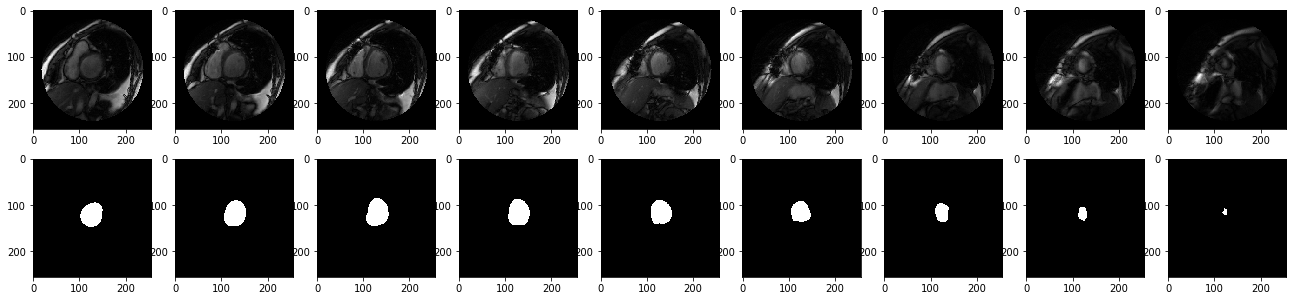

In [5]:
# plot all the slices
plt.figure(figsize=(25,5))
plt.subplot()
plt.subplot(2,10,1) #x_train, y_train
plt.imshow(images_list[0,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,2) #x_train, y_train
plt.imshow(images_list[1,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,3) #x_train, y_train
plt.imshow(images_list[2,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,4) #x_train, y_train
plt.imshow(images_list[3,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,5) #x_train, y_train
plt.imshow(images_list[4,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,6) #x_train, y_train
plt.imshow(images_list[5,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,7) #x_train, y_train
plt.imshow(images_list[6,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,8) #x_train, y_train
plt.imshow(images_list[7,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,9) #x_train, y_train
plt.imshow(images_list[8,:,:,0], 'gray', interpolation='none')


plt.subplot(2,10,11) #x_train, y_train
plt.imshow(labels_list[0,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,12) #x_train, y_train
plt.imshow(labels_list[1,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,13) #x_train, y_train
plt.imshow(labels_list[2,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,14) #x_train, y_train
plt.imshow(labels_list[3,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,15) #x_train, y_train
plt.imshow(labels_list[4,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,16) #x_train, y_train
plt.imshow(labels_list[5,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,17) #x_train, y_train
plt.imshow(labels_list[6,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,18) #x_train, y_train
plt.imshow(labels_list[7,:,:,0], 'gray', interpolation='none')
plt.subplot(2,10,19) #x_train, y_train
plt.imshow(labels_list[8,:,:,0], 'gray', interpolation='none')

plt.savefig("esempio2_short_axis.png")

<ipython-input-1-fa65e761f018>:11: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, normals, values = measure.marching_cubes_lewiner(p, threshold)


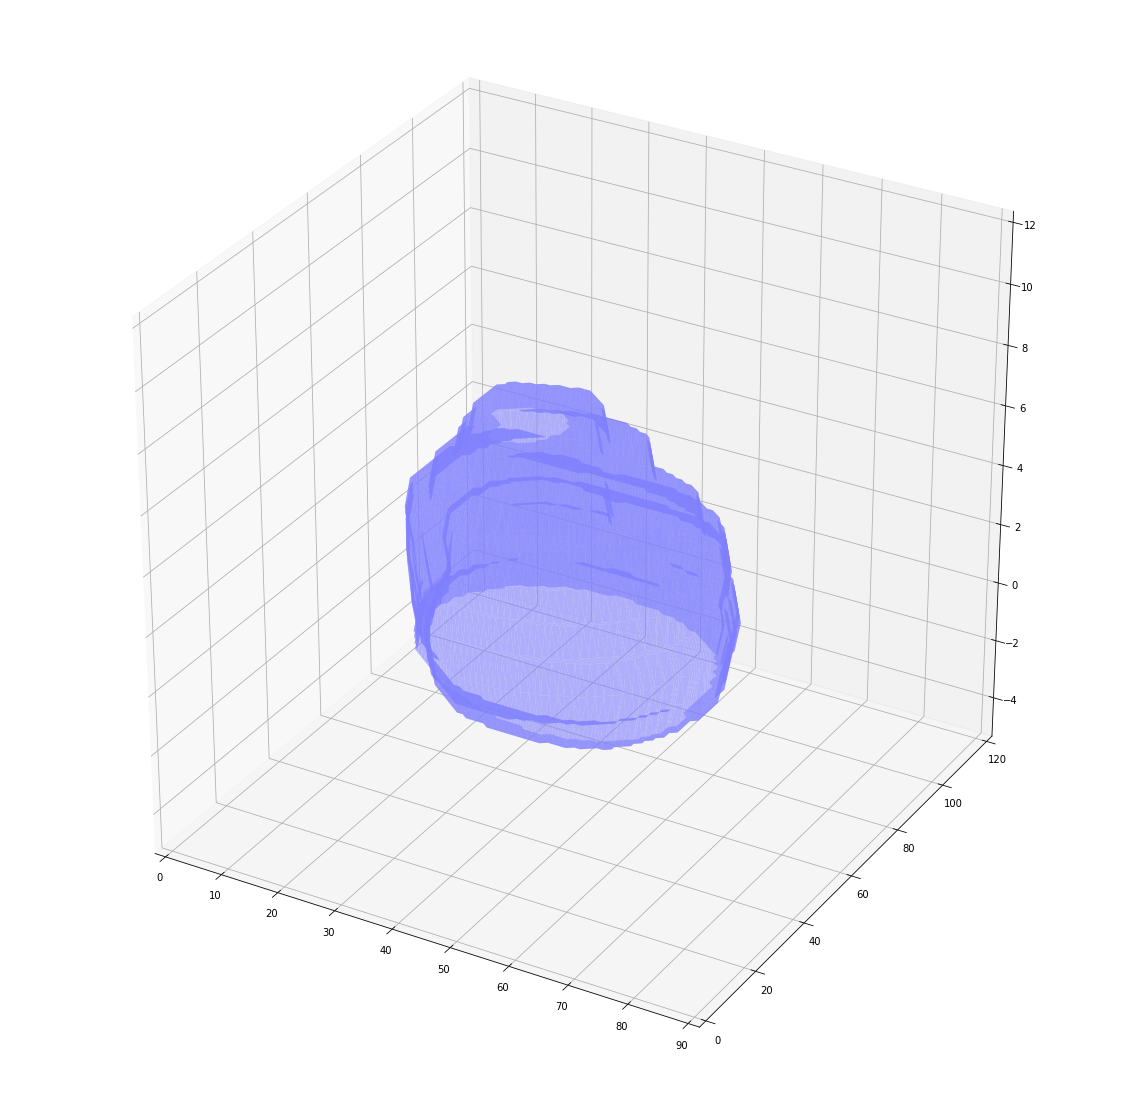

In [6]:
# plot the 3D volume
plot_3d(labels_list[:,70:190,80:170,0],0)